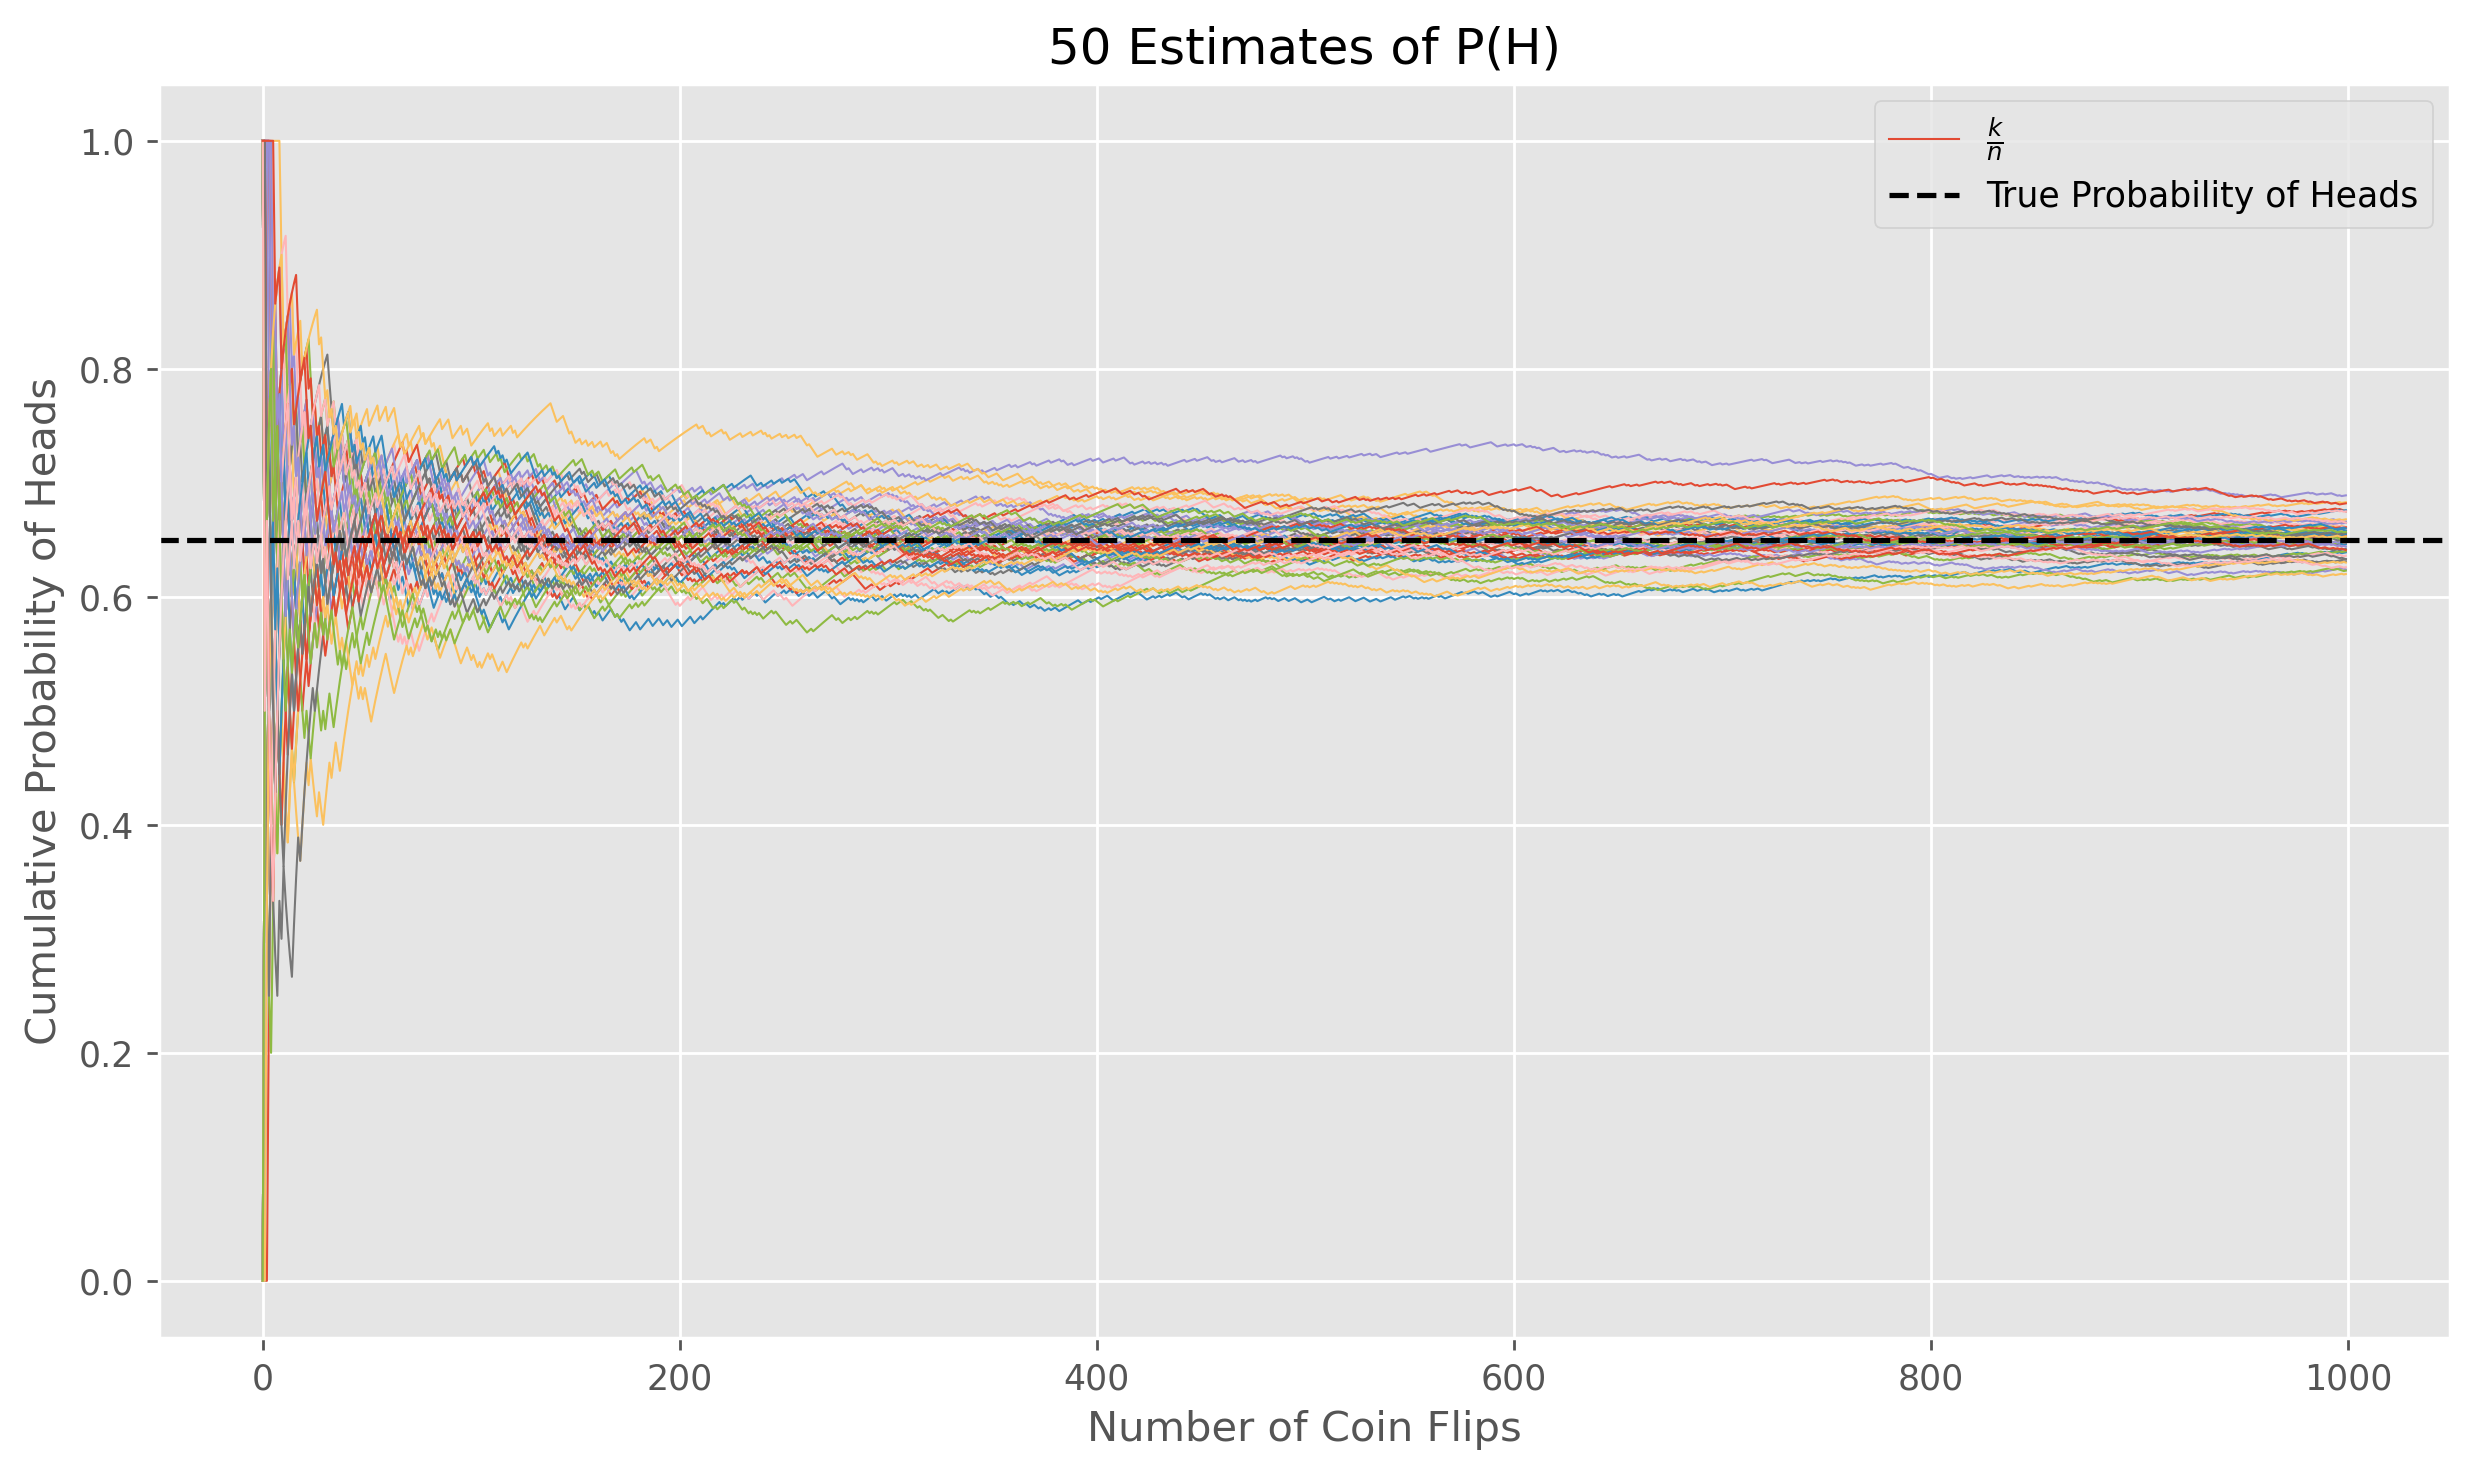

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
true_theta = 0.65   # True theta
n_flips = 1000  # Number of coin flips
trials = 50   # 50 trials of 1000 flips each
trial_outcomes = []
for trial in range(trials):
    # Simulate coin flips
    outcomes = np.random.binomial(n=1, p=true_theta, size=n_flips)  # 1 is heads, 0 is tails
    mle = np.cumsum(outcomes) / np.arange(1, n_flips + 1)
    trial_outcomes.append(mle)
# Plotting
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 250
plt.figure(figsize=(10, 6))
for i, outcome in enumerate(trial_outcomes):
    if i == 0:
        plt.plot(outcome, label=r'$\frac{k}{n}$', lw=0.6)
    else:
        plt.plot(outcome, lw=0.6)
plt.axhline(y=true_theta, color='black', linestyle='--', label='True Probability of Heads')
plt.title('50 Estimates of P(H)')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Cumulative Probability of Heads')
plt.legend()
plt.tight_layout()
plt.show()

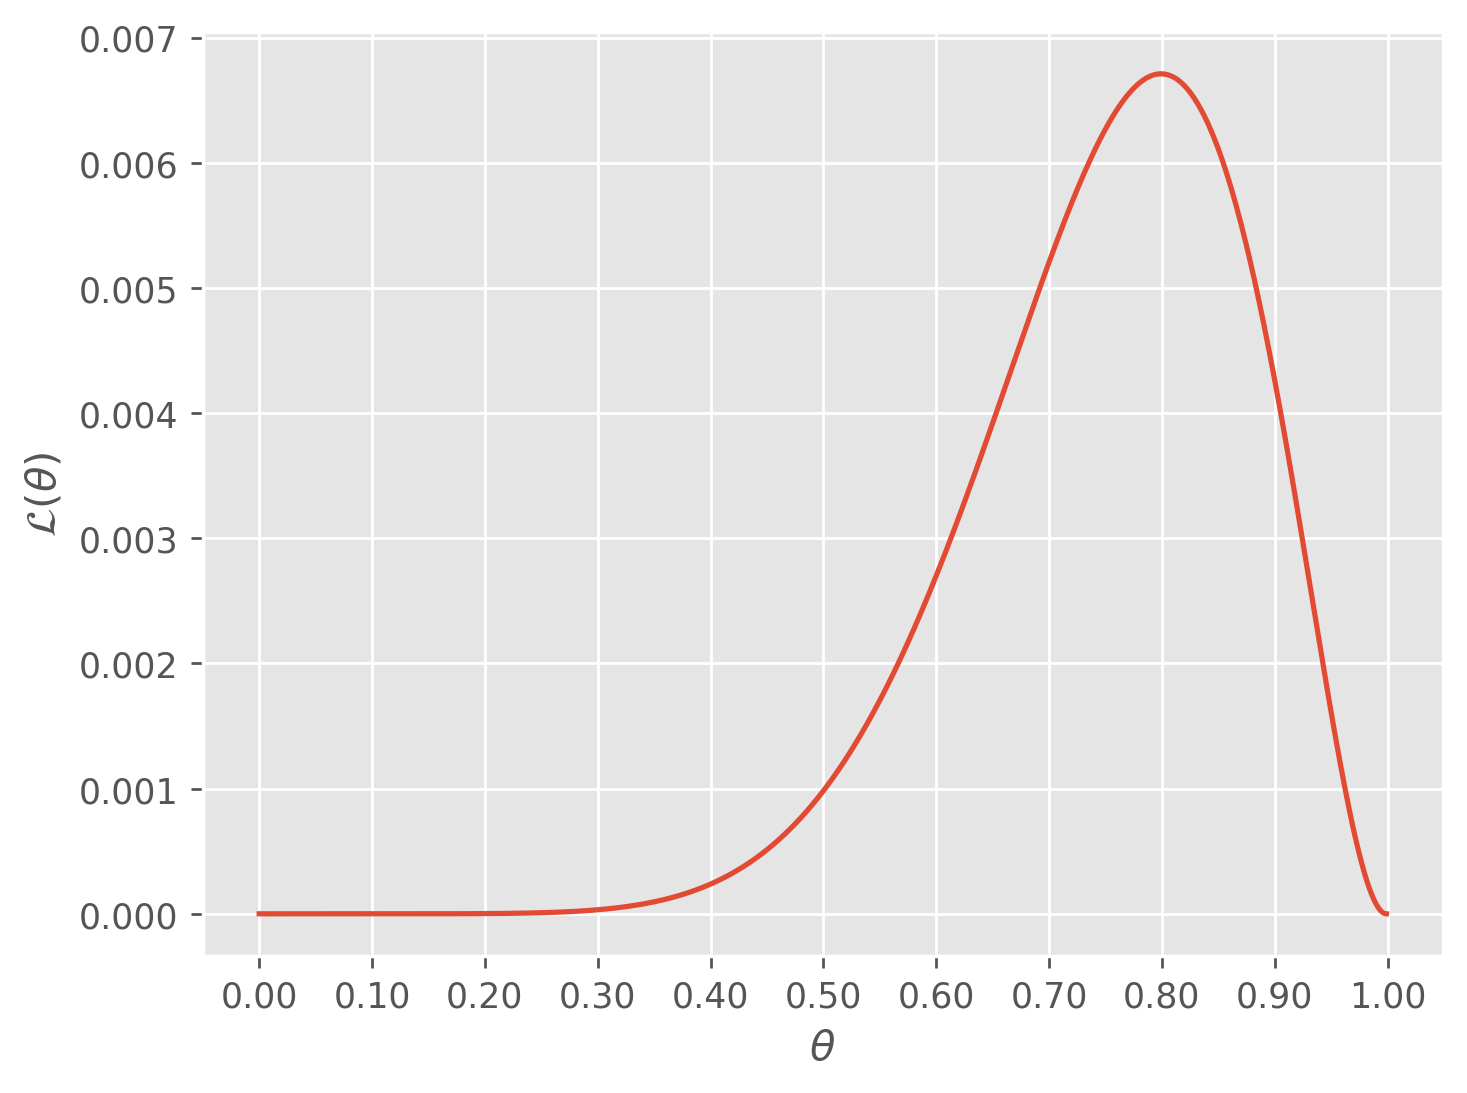

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 250
def likelihood_function(n_heads: int, n_tails: int, theta: float) -> float:
    return (theta ** n_heads) * ((1 - theta) ** n_tails)
theta_values = np.linspace(0, 1, 1000)
heads, tails = 8, 2
plt.plot((likelihood_function(heads, tails, theta_values)))
plt.xticks(np.arange(0, 1001, 100), [f'{0.1 * i:0.2f}' for i in range(11)])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathcal{L}(\theta)$')
plt.show()

# #Plot 2
# heads = [7 * 2**i for i in range(7)]    # Heads is always 80%
# tails = [3 * 2**i for i in range(7)]    # Tails is always 20%
# for i, (n_heads, n_tails) in enumerate(zip(heads, tails)):
#     likelihood = likelihood_function(n_heads, n_tails, theta_values)
#     plt.plot(likelihood / np.linalg.norm(likelihood), label=f'n={n_heads + n_tails}')
# plt.xticks(np.arange(0, 1001, 100), [f'{0.1 * i:0.2f}' for i in range(11)])
# plt.xlabel(r'$\theta$')
# plt.ylabel(r'$\frac{L(\theta)}{\Vert L(\theta)\Vert_2^2}$')
# plt.title('Likelihood Function for Varying $n$')
# plt.legend(loc='upper left')
# plt.show()

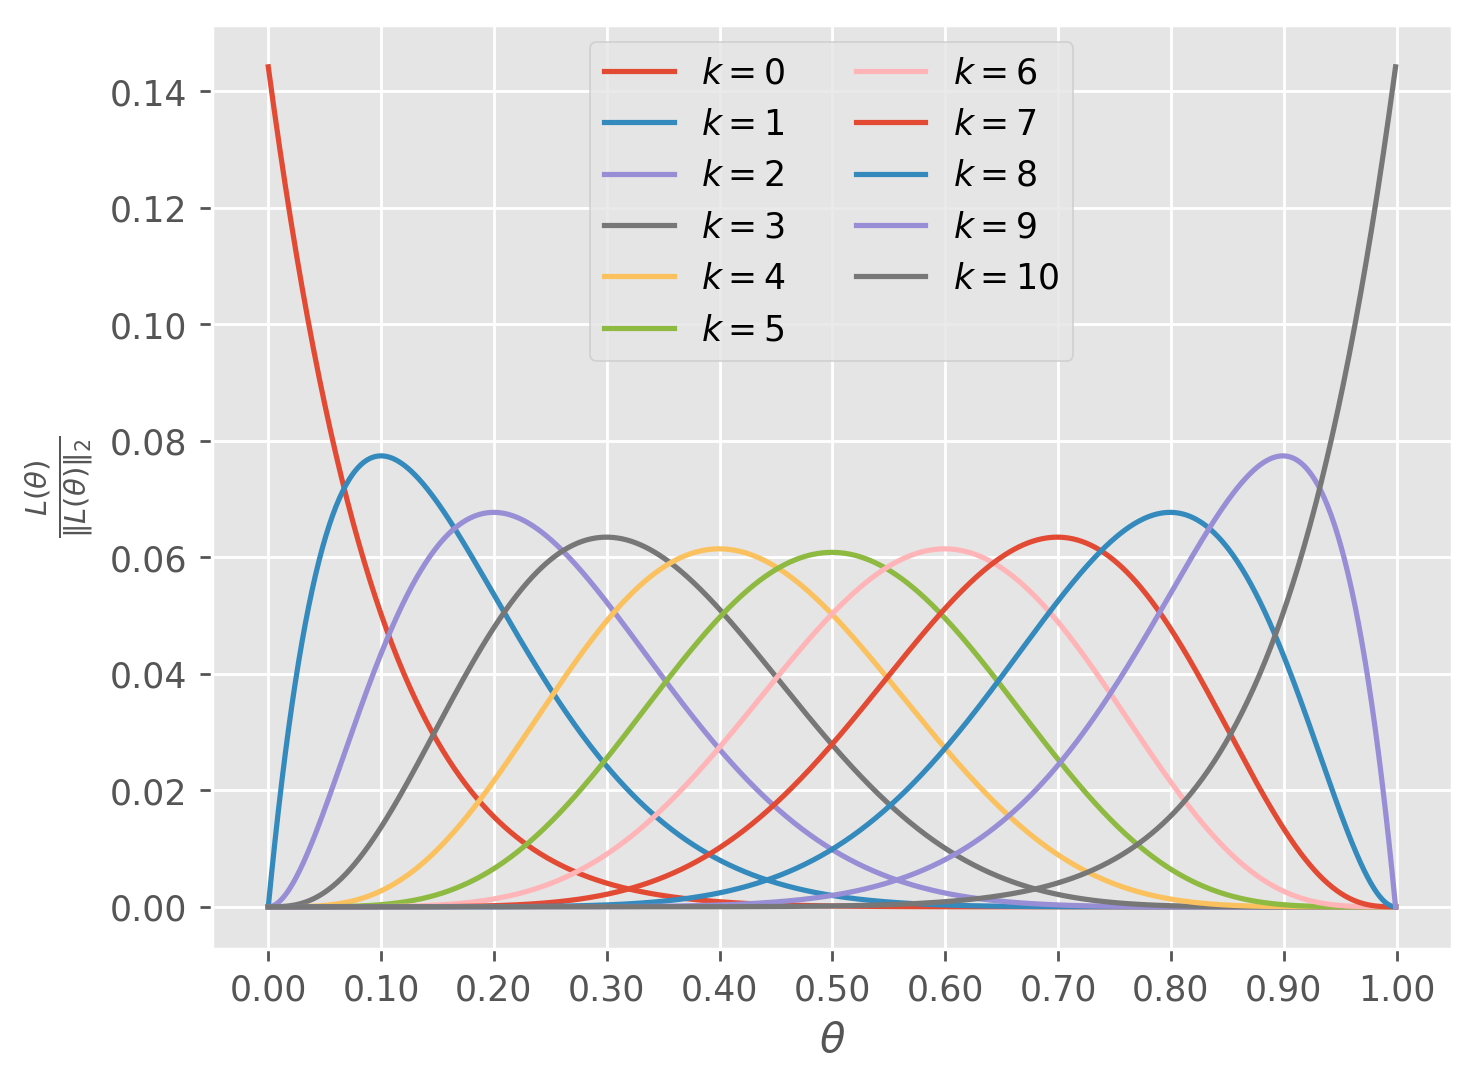

In [3]:
theta_values = np.linspace(0, 1, 1000)
heads = np.arange(11)
for n_heads in heads:
    n_tails = 10 - n_heads
    likelihood = likelihood_function(n_heads, n_tails, theta_values)
    plt.plot(likelihood / np.linalg.norm(likelihood), label=fr'$k = {n_heads}$')
plt.xticks(np.arange(0, 1001, 100), [f'{0.1 * i:0.2f}' for i in range(11)])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{L(\theta)}{\Vert L(\theta)\Vert_2}$')
plt.legend(ncol=2)
plt.show()